In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_004.nc')
t0 = 60 # Start from day 30
tn = len(state0.T) # End day
state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction

In [14]:
Hs = 12
Qf = 700
Az = 1e-5
X = state.X.data
x_dist = X / 1000
depth = state.Z.data

u0 = state.U.data # dims = T, Z, Y, Xp1
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u = u_ymean.mean(0) # dims = Z, X
u[u==0] = np.nan
u_x = np.gradient(u, X, axis=1)
u_z = np.gradient(u, depth, axis=0)
vis = np.gradient(Az*u_z, depth, axis=0)
adv = u * u_x
R = vis / adv
#u1[1,:] = np.gradient(u1[1,:], X)
#u2 = np.gradient(u1, X, axis=1)
#np.gradient(u1[0,:], X), u2
R[:20,:]

array([[            nan,             nan, -1.42019941e-03,
        -3.59640480e-03, -7.47895520e-03, -1.26568433e-02,
        -1.73632428e-02, -2.44308989e-02, -5.95866591e-02,
        -1.39138269e+00, -1.04690712e+02, -8.81792232e-02,
         1.94467255e-03,  1.78429782e-02,  1.78007260e-02,
         1.79480650e-02,  2.05580760e-02,  2.94568259e-02,
         4.69237305e-02,  4.16911133e-02,  2.73883101e-02,
         2.83976048e-02,  2.54978053e-02,  3.35821174e-02,
        -1.31473273e-01,  5.91365434e-02, -4.73050820e-03,
        -1.21589110e-03, -1.09678903e-03, -2.62655714e-03,
        -5.91127248e-03, -8.23942572e-03, -1.10997073e-02,
        -1.45703238e-02, -1.53416609e-02, -2.83447909e-03,
         5.63496724e-02,  3.60373378e+00, -2.81500041e-01,
        -1.06976591e-01, -8.51180553e-02, -7.25945756e-02,
        -5.61377481e-02, -3.18286978e-02, -1.12701403e-02,
        -1.87577419e-02,  2.93194922e-03,  5.46558062e-04,
         7.17684743e-04,  0.00000000e+00],
       [     

Text(0, 0.5, 'Depth (m)')

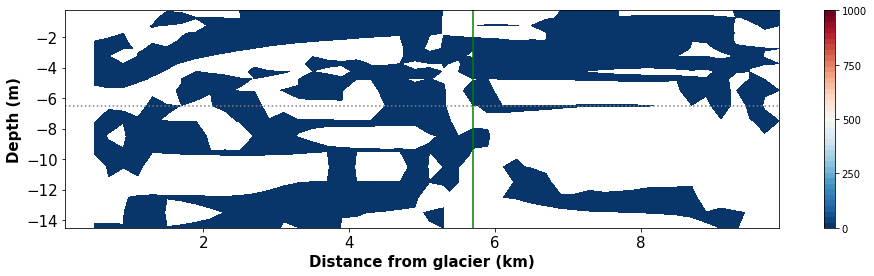

In [13]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/Vis_Adv/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/FrPseries/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig, ax = plt.subplots(figsize=(16,4)) 
#ca = np.linspace(-2.6e-4,2.4e-4,40) # Contour range for advection
ca = np.linspace(1e-7,1000,40)
# Plot advection field
plt.contourf(x_dist,depth[:20], R[:20,:], ca, cmap='RdBu_r')
ax.axvline(x_dist[28],color='g')
ax.axhline(y=-6.5,color='gray', linestyle=':')

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
cbar = plt.colorbar(ticks=np.linspace(1e-7,1000,5))
#cbar = plt.colorbar(ticks=np.linspace(-2.6e-4,2.4e-4,5), format=OOMFormatter(-4, mathText=True))
#cbar.ax.tick_params(labelsize=12)
#cbar.set_label('Advection (m\u00B2/s)', size=15, weight='bold')

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
ax.set_xlabel('Distance from glacier (km)', size = 15, weight = 'bold')
ax.set_ylabel('Depth (m)', size = 15, weight = 'bold')

#fig.savefig(fig_path + '/Qf' + str(Qf) + '.png', dpi = 150, bbox_inches='tight')